# **Airline Customer Satisfaction**
**Aim:**
To classify customer satisfaction of a particular airline using the Airline Satisfaction Dataset.

**Dataset:**
[Airline Passenger Satisfaction Dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

**Size:** (129880, 23)

**Domain:**
Travel & Tourism

## Domain Prerequisite Learning

Customer satisfaction is a complex customer experience in the service industry and can be defined as an evaluation of which the customers have experienced.Understanding what consumers expect from a service industry is important in order to provide a standard of comparison against which consumers judge an organization’s performance regarding the expectation

Customer satisfaction is an essential aspect of the airline industry, and it plays a crucial role in building customer loyalty and repeat business. When customers have a positive experience with an airline, they are more likely to continue using its
services in the future and recommend it to others. On the other hand, if customers have a negative experience, they may switch to a competitor or leave negative reviews, which can harm the airline's reputation and revenue.

To influence customer satisfaction, airline companies provide a range of services and amenities that cater to the needs and preferences of different passengers. For example, airlines strive to maintain their aircraft in clean, well-maintained condition to provide a comfortable and safe environment for passengers. They also offer in-flight entertainment systems, such as movies, TV shows, and music, to keep passengers entertained during the flight. Some airlines even offer personalized recommendations based on a passenger's viewing history or preferences, which can increase customer satisfaction.

Airlines also offer premium services, such as priority boarding, extra legroom, and dedicated check-in and baggage handling for their premium passengers.

## **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Reading datasets**

In [ ]:
df_train = pd.read_csv("archive/train.csv")
df_test = pd.read_csv('archive/test.csv')

df = pd.concat((df_train, df_test), axis = 0)

df.drop(['Unnamed: 0', 'id'], axis = 1, inplace=True)

print(f'Shape of Dataset: {df.shape}')
df.head()

Shape of Dataset: (129880, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## **Features Description**

**This dataset has 22 features for the classification problem of Airline Customer Satisfaction. The description of each feature is as following:**

* **Gender:** Gender of the passengers (Female, Male)
* **Customer Type:** The customer type (Loyal customer, disloyal customer)
* **Age:** The actual age of the passengers
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* **Flight distance:** The flight distance of this journey
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
* **Ease of Online booking:** Satisfaction level of online booking
* **Gate location:** Satisfaction level of Gate location
* **Food and drink:** Satisfaction level of Food and drink
* **Online boarding:** Satisfaction level of online boarding
* **Seat comfort:** Satisfaction level of Seat comfort
* **Inflight entertainment:** Satisfaction level of inflight entertainment
* **On-board service:** Satisfaction level of On-board service
* **Leg room service:** Satisfaction level of Leg room service
* **Baggage handling:** Satisfaction level of baggage handling
* **Check-in service:** Satisfaction level of Check-in service
* **Inflight service:** Satisfaction level of inflight service
* **Cleanliness:** Satisfaction level of Cleanliness
* **Departure Delay in Minutes:** Minutes delayed when departure
* **Arrival Delay in Minutes:** Minutes delayed when Arrival

>**Target Variable:**
>
> ***Satisfaction:*** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

**Categorical Variables:** Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.

**Numerical Variables:** id,Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

## Data Mining Dashboard

We will now study the data to better understand the underlying reasons for passenger satisfaction and subsequently for their dissatisfaction. We will study the target variable with respect to some of the features in order to develop better insights about the data.

**Checking balance of dataset**

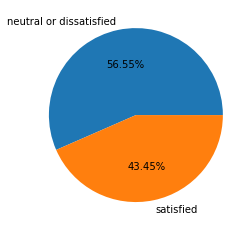

In [ ]:
plt.pie(df['satisfaction'].value_counts(),labels=df.satisfaction.unique(),autopct='%0.2f%%')
plt.show()

>As we can see from the pie chart, the dataset is **balanced**

**Correlation Heat Map**

/var/folders/11/qj1v9m9n6159r0f8tzq4w1zc0000gn/T/ipykernel_60803/3477505800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

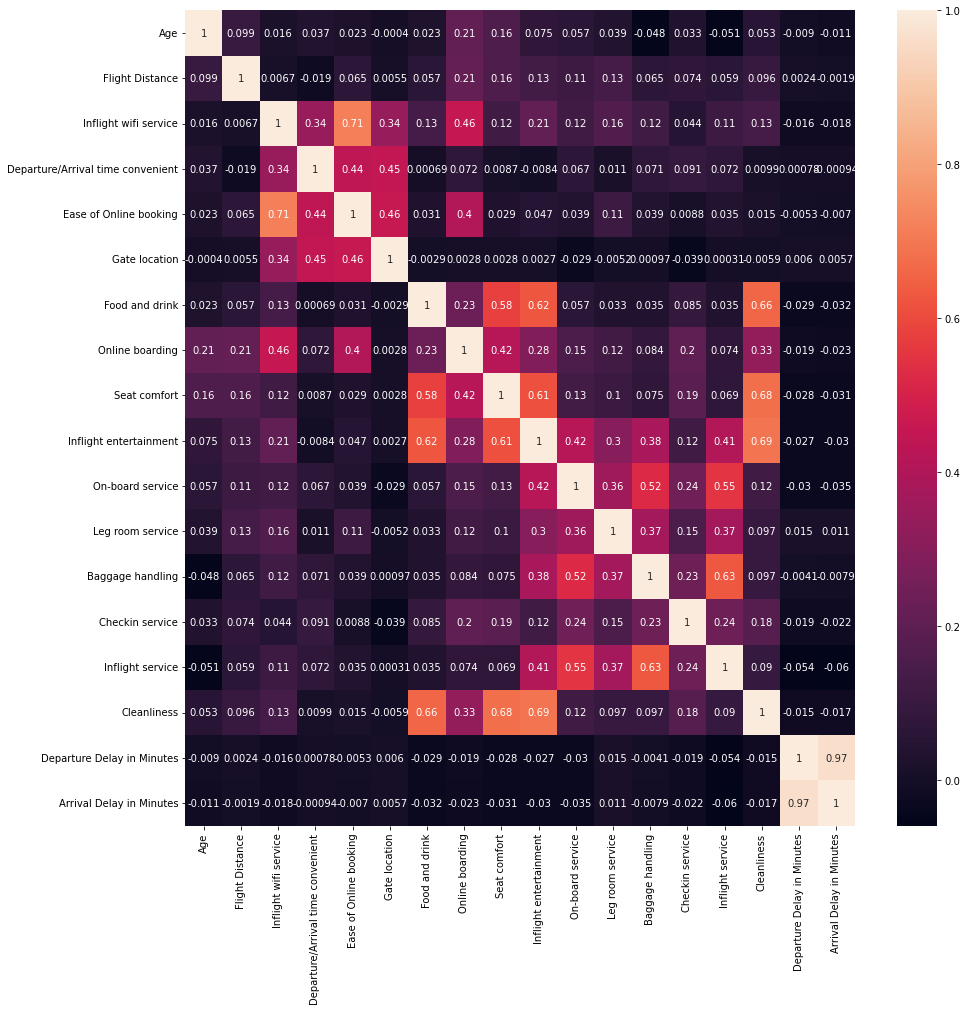

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

>We can see that there is a strong positive correlation between 'Departure delay in minutes' and 'Arrival delay in minutes'


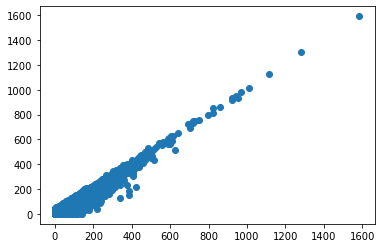

In [ ]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'])
plt.show()

We can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained can be explained as follows:

>If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

We will deal the dependency of these two features by dropping one of them in Data Preprocessing

**Histogram of Satisfaction with respect to Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

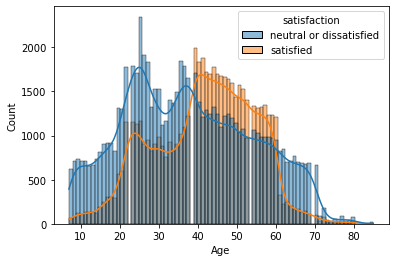

In [ ]:
sns.histplot(x='Age',hue="satisfaction",data=df,kde=True)

>Customers less than the age of 35 are dissatisfied with the overall flight experience.
>
>Whereas customers over the age of 40 are generally happy with the experience.

**Customer satisfaction with respect to customer loyalty**

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

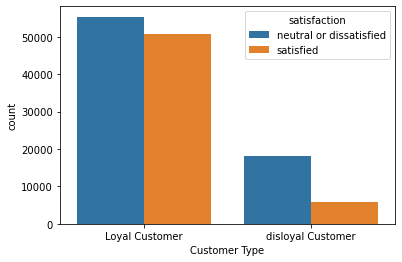

In [ ]:
sns.countplot(x='Customer Type',hue="satisfaction",data=df)

>Disloyal customers are generally neutral or dissatisfied with the flight.
>
>As we see Disloyal Customers have more dissatisfaction and that makes sense as they are not loyal customers.
>But in Loyal Customers also have more dissatisfaction and that's a problem.

**Pair plot for Quantitative variables**

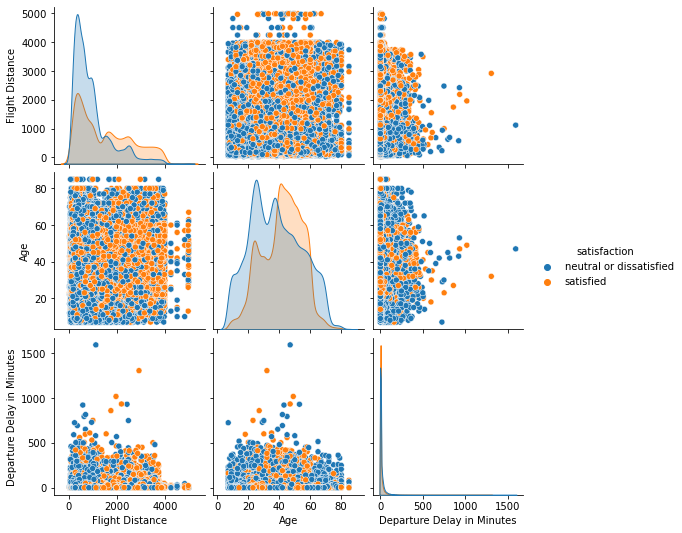

In [ ]:
sns.pairplot(data=df, vars=['Flight Distance',"Age","Departure Delay in Minutes"],hue="satisfaction")

**Bar Plots for Feature Wise Passenger Score**

To check the ratings given by customers to the different services provided by the airline, food and in-flight services scores, aircraft specifications (services provided on the airport) before boarding the flight.

Also to study the distribution that the features follow.

In [ ]:
# Helper function for plotting Bar graphs
def bar_plot(variable):
    var = df[variable]
    var_value = var.value_counts().sort_index()

    plt.figure(figsize=(12,4))
    plt.bar(var_value.index, var_value.values)

    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")

    plt.title(variable)
    plt.show()

    print("{}: \n {}".format(variable,var_value))

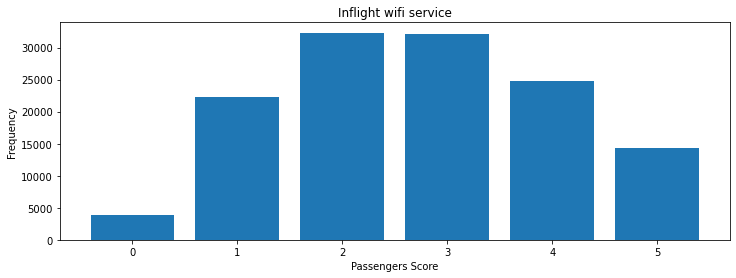

Inflight wifi service: 
 0     3916
1    22328
2    32320
3    32185
4    24775
5    14356
Name: Inflight wifi service, dtype: int64


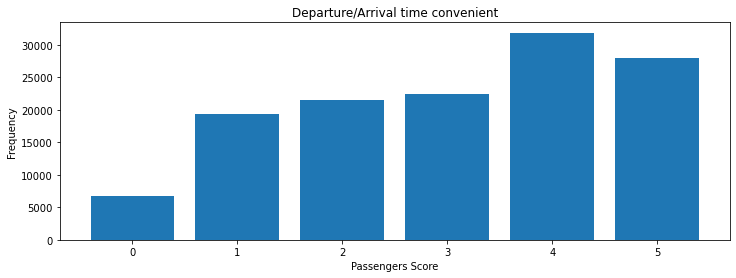

Departure/Arrival time convenient: 
 0     6681
1    19409
2    21534
3    22378
4    31880
5    27998
Name: Departure/Arrival time convenient, dtype: int64


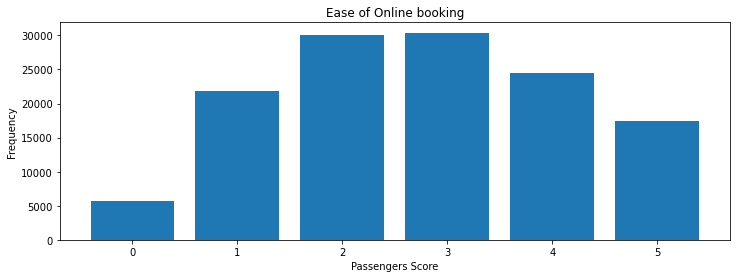

Ease of Online booking: 
 0     5682
1    21886
2    30051
3    30393
4    24444
5    17424
Name: Ease of Online booking, dtype: int64


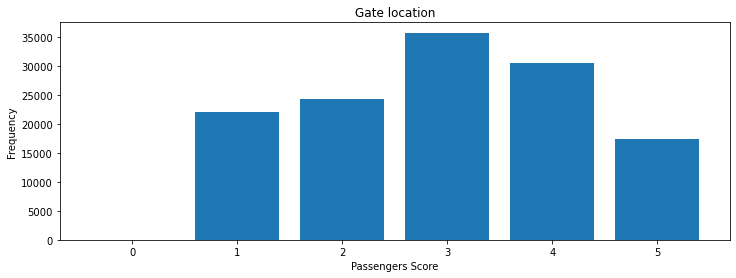

Gate location: 
 0        1
1    21991
2    24296
3    35717
4    30466
5    17409
Name: Gate location, dtype: int64


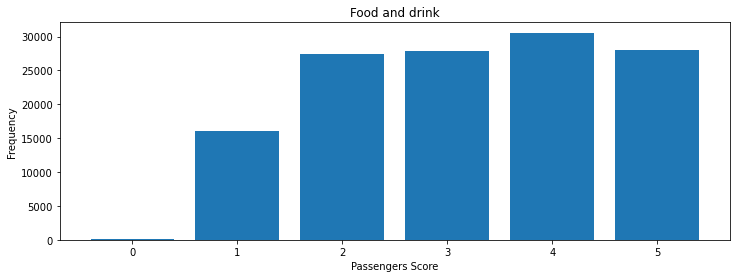

Food and drink: 
 0      132
1    16051
2    27383
3    27794
4    30563
5    27957
Name: Food and drink, dtype: int64


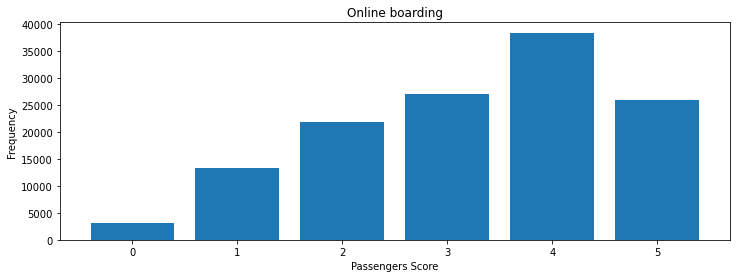

Online boarding: 
 0     3080
1    13261
2    21934
3    27117
4    38468
5    26020
Name: Online boarding, dtype: int64


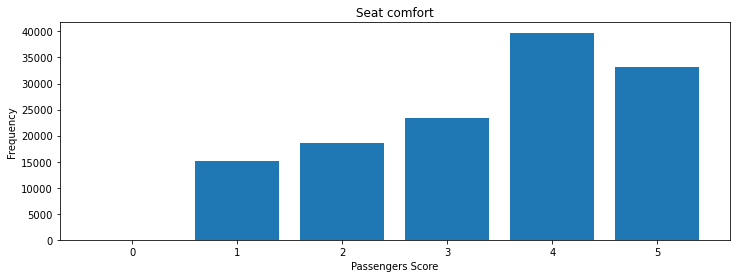

Seat comfort: 
 0        1
1    15108
2    18529
3    23328
4    39756
5    33158
Name: Seat comfort, dtype: int64


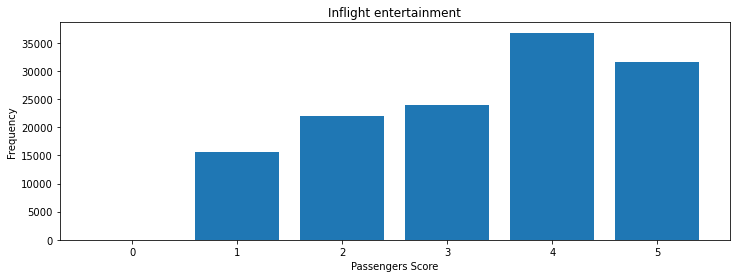

Inflight entertainment: 
 0       18
1    15675
2    21968
3    23884
4    36791
5    31544
Name: Inflight entertainment, dtype: int64


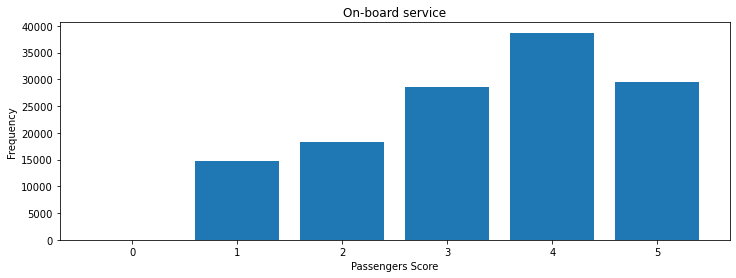

On-board service: 
 0        5
1    14787
2    18351
3    28542
4    38703
5    29492
Name: On-board service, dtype: int64


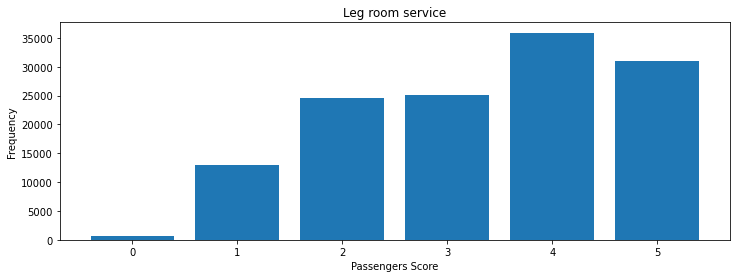

Leg room service: 
 0      598
1    12895
2    24540
3    25056
4    35886
5    30905
Name: Leg room service, dtype: int64


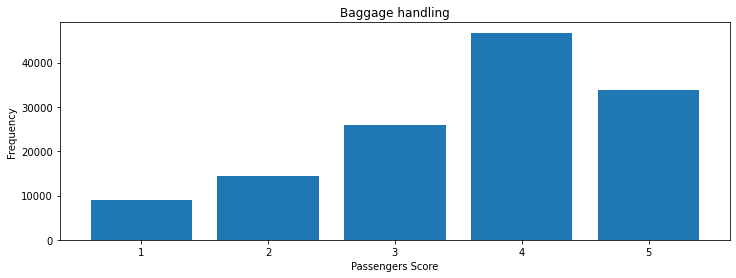

Baggage handling: 
 1     9028
2    14362
3    25851
4    46761
5    33878
Name: Baggage handling, dtype: int64


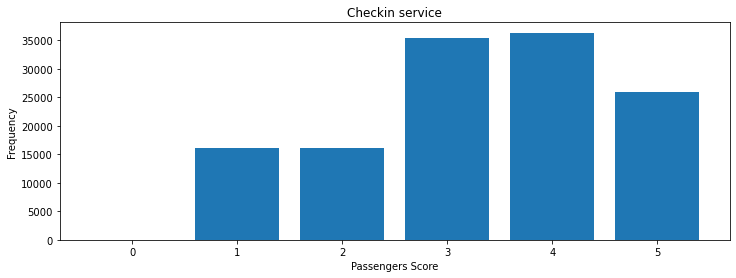

Checkin service: 
 0        1
1    16108
2    16102
3    35453
4    36333
5    25883
Name: Checkin service, dtype: int64


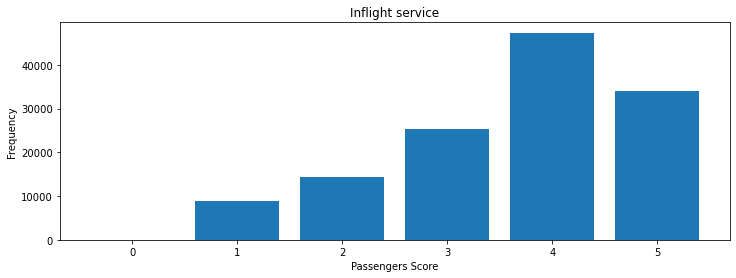

Inflight service: 
 0        5
1     8862
2    14308
3    25316
4    47323
5    34066
Name: Inflight service, dtype: int64


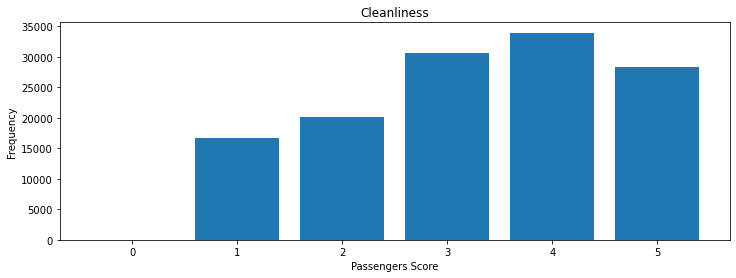

Cleanliness: 
 0       14
1    16729
2    20113
3    30639
4    33969
5    28416
Name: Cleanliness, dtype: int64


In [ ]:
passenger_scores = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink",
                   "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service",
                   "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]

for score in passenger_scores:
    bar_plot(score)

>Most of the features follow the normal distribution and a few follow a left-skewed normal distribution with more points towards the higher value of rating.

**Satisfaction with respect to Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

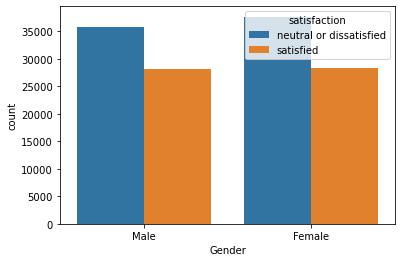

In [ ]:
sns.countplot(data=df, x = 'Gender', hue = 'satisfaction')

>Females and males customers satisfaction probability are almost equal.


**Satisfaction with respect to Type of Travel**

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

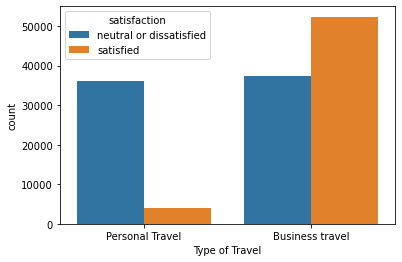

In [ ]:
sns.countplot(data = df, x='Type of Travel', hue ='satisfaction')

>Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
>
>Personal travel is generally neutral or dissatisfied with the flight.
Let's examine why.


**Study of Personal Travel**

In [ ]:
personal=df[df['Type of Travel']=="Personal Travel"]
personal.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
11,Female,Loyal Customer,12,Personal Travel,Eco Plus,308,2,4,2,2,...,1,1,2,5,5,5,1,0,0.0,neutral or dissatisfied
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,5,2,2,2,4,0,0.0,satisfied


**Distribution of passengers using for personal travel with respect to class**

<AxesSubplot:xlabel='Class', ylabel='count'>

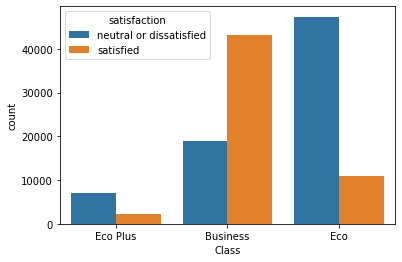

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', data = df)

>People who travel in Economy class are not satisfied with the flight service
>
Let's study the reason for this by understanding what is the reason for flying for this class of travel

**Bar plot of number of passengers for each class of travel**

<AxesSubplot:xlabel='Class', ylabel='count'>

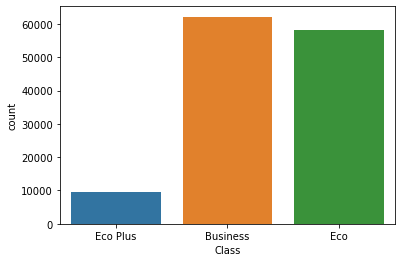

In [ ]:
sns.countplot(data = df, x='Class')

Nearly an equal amount of people use Economy as compared to Business class

**Bar plot of type of travel for different classes**

<AxesSubplot:xlabel='Class', ylabel='count'>

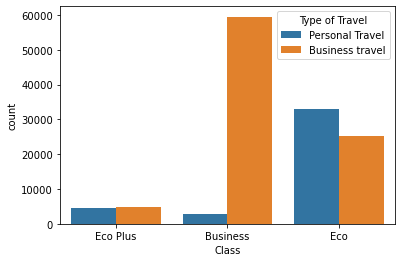

In [ ]:
sns.countplot(data = df, x = 'Class', hue = 'Type of Travel')

> As we can see, a lot of people use Economy class for business travel. This dissatisfaction could be reduced by giving special corporate rates or credit miles for people flying Economy class frequently or upgrading certain frequent travellers to Business class

## Data Preprocessing

We will now start preprocessing our dataset by applying the following steps:

1) Handling Null and Duplicate Values
2) Outlier Handling
3) Feature Engineering
4) Variable Encoding
5) Feature Scaling
6) PCA

### 1) Handling Null and Duplicate Values

**Checking the number of null values**

In [ ]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

**Checking the number of duplicate values**

In [ ]:
df.duplicated().sum()

0

We can see that **'Arrival Delay in Minutes'** has 393 null values which is _**less than 0.5% of the data**_. Since our **dataset is balanced**, we can handle these null values by deleting the records with null values

In [ ]:
df.dropna(inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### 2) Outlier Detection

We will now check the dataset for outliers and apply the following measures based on the percentage present in the dataset:

1) <5%      Drop the outliers
2) 10%>     Replace with Q3+1.5IQR of the distribution for high values and Q1-1.5IQR for low values

**Box Plots to visualize outliers**

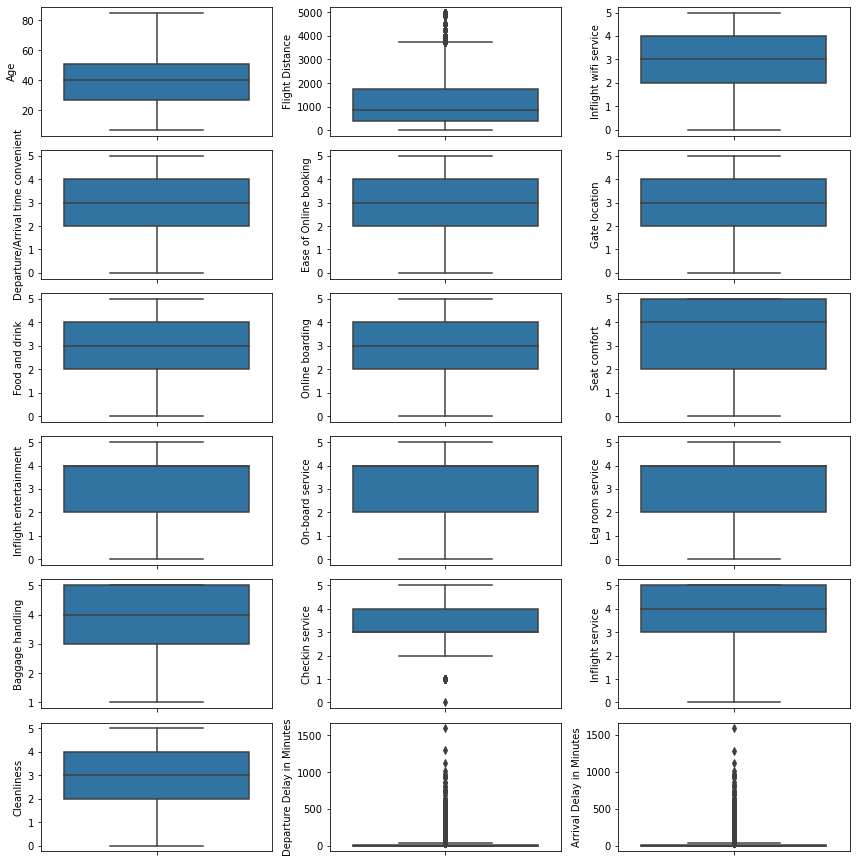

In [ ]:
fig = plt.figure(figsize=(12,18))

numerical_features = df.select_dtypes(exclude=['object']).copy()

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,3,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()

**Helper Functions for Outlier Removal**

In [ ]:

def detect_outliers(df,features):
    outlier_indices=[]

    for x in features:
        Q1=np.percentile(df[x],25)

        Q3=np.percentile(df[x],75)

        IQR= Q3-Q1

        outlier_step= IQR * 1.5

        outlier_list_col = df[(df[x]< Q1 - outlier_step)|( df[x] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'])]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80,Male,Loyal Customer,26,Business travel,Business,3960,1,1,1,1,...,4,4,2,5,4,4,4,45,48.0,satisfied
80,Female,Loyal Customer,61,Business travel,Business,1585,2,2,3,2,...,3,3,4,3,4,3,4,24,20.0,satisfied
388,Female,Loyal Customer,43,Business travel,Business,3946,3,3,3,3,...,4,4,4,4,5,4,4,0,0.0,satisfied
388,Male,disloyal Customer,29,Business travel,Business,1099,1,1,1,2,...,3,1,4,2,1,2,3,51,51.0,neutral or dissatisfied
446,Female,Loyal Customer,44,Business travel,Business,3767,1,1,1,1,...,2,2,2,1,4,2,2,44,92.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25459,Male,Loyal Customer,12,Personal Travel,Eco,990,1,4,1,4,...,3,5,5,5,3,5,3,243,244.0,neutral or dissatisfied
25729,Female,Loyal Customer,44,Personal Travel,Eco,551,1,2,1,3,...,3,3,1,3,2,3,2,30,53.0,neutral or dissatisfied
25729,Female,Loyal Customer,54,Business travel,Business,602,4,4,4,4,...,2,2,2,2,4,2,5,53,40.0,satisfied
25834,Male,Loyal Customer,18,Personal Travel,Eco Plus,577,3,5,4,2,...,4,3,3,4,4,4,4,28,51.0,neutral or dissatisfied


>As we can see we have 5600 outliers in our dataset. Since this is **less than 5%** of our dataset and our **dataset is balanced**, we can drop these values

In [ ]:
print(f'No. of records before dropping outliers: {df.shape[0]}')

No. of records before dropping outliers: 129487


In [ ]:
df.drop(detect_outliers(df,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']),axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
print(f'No. of records after dropping outliers: {df.shape[0]}')

No. of records after dropping outliers: 123887


### 3) Feature Engineering

We've seen that there is a high correlation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', we can drop 'Arrival Delay in Minutes'. This seems to be logical since 'Departure Delay in Minutes' would lead to the causation of 'Arrival Delay in Minutes'

In [ ]:
df.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


**We now split the Feature Matrix (X) and target (y)**

In [ ]:
X, y = df[df.columns[:-1]], df[df.columns[-1]]
print(X.shape, y.shape)

(123887, 21) (123887,)


### 4) Encoding Categorical Variables

We will now **encode the categorical data** using dummy variables.

We **leave the ordinal data** as it is since the order matters to the our classification

In [ ]:
X = pd.get_dummies(data = X, columns = ['Gender', 'Customer Type', 'Type of Travel',
                                         'Class'], drop_first=True)
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(data = y, drop_first = True)
y.head()

,satisfied
0,0
1,0
2,1
3,0
4,1


Now our target variable 'satisfied' is marked with

**0:'Neutral or Dissatisfied'**

**1:'Satisfied'**

### 5) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(X[['Age', 'Flight Distance', 'Departure Delay in Minutes']])
scaled = pd.DataFrame(scaled, columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes'])

X.drop(['Age', 'Flight Distance', 'Departure Delay in Minutes'], axis = 1, inplace = True)
X = pd.concat((X, scaled), axis = 1)
X.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes
0,3,4,3,1,5,3,5,5,4,3,...,5,5,1,0,1,0,1,-1.750242,-0.733030,0.373352
1,3,2,3,3,1,3,1,1,1,5,...,4,1,1,1,0,0,0,-0.956109,-0.960669,-0.335840
2,2,2,2,2,5,5,5,5,4,3,...,4,5,0,0,0,0,0,-0.889931,-0.043031,-0.365389
3,2,5,5,5,2,2,2,2,2,5,...,4,2,0,0,0,0,0,-0.956109,-0.629833,-0.040343
4,3,3,3,3,4,5,5,3,3,4,...,3,3,1,0,0,0,0,1.426292,-0.981915,-0.365389


### 6) Applying PCA

We are now going to apply PCA to our feature matrix to get back amount of explained variance as 95%

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X = pca.fit_transform(X)

In [ ]:
print(pca.explained_variance_ratio_)

[0.2423546  0.16703157 0.12749731 0.07660696 0.05960926 0.04653911
 0.04328486 0.03854874 0.03631923 0.03301211 0.02745242 0.02586522
 0.02095692 0.01894824]


Text(0, 0.5, 'Variance Explained')

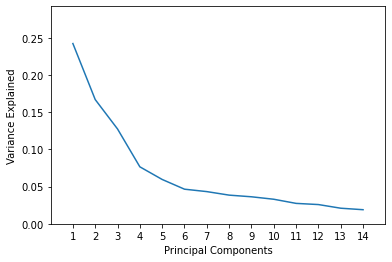

In [ ]:
plt.plot(list(range(1,15)), pca.explained_variance_ratio_)
plt.axis([0, 15, 0, max(pca.explained_variance_ratio_)+0.05])
plt.xticks(list(range(1,15)))
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

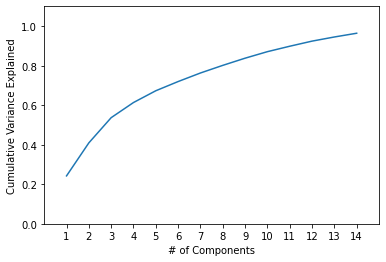

In [ ]:
plt.plot(list(range(1,15)), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, 15, 0, 1.1])

plt.xticks(list(range(1,15)))
plt.xlabel('# of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

>After applying PCA we get back a feature matrix of 15 features having an explained variance of 95%

We will use this feature matrix for model selection


## Model Selection

We will be applying **SVM, RandomForestClassifier, LogisticRegression, KNearestNeighbourClassifier** for the following reasons:

1) **SVM**: SVMs are effective in high-dimensional spaces and can be used for both classification and regression tasks. They are particularly useful when the number of features is larger than the number of samples. SVMs can handle non-linear decision boundaries using different kernel functions, such as the radial basis function (RBF) kernel.


2) **Random Forest**: Random Forest is an ensemble method that combines multiple decision trees to improve the accuracy and reduce overfitting. It is easy to implement and can handle both classification and regression problems. Random Forest can handle missing values and can also provide a measure of feature importance.


3) **Logistic Regression**: Logistic regression is a simple and efficient linear model for binary classification problems. It can handle both categorical and continuous input features, and can provide interpretable coefficients to understand the impact of each feature on the target variable. Logistic regression can also handle imbalanced datasets by using class weights or cost-sensitive learning.


4) **KNearest Neighbours**:  KNN is a non-parametric method that does not assume any underlying distribution of the data. It can handle non-linear decision boundaries and can work well with small datasets. KNN is easy to understand and implement, and can be used for both classification and regression tasks..


We will also be using **Accuracy** as our main metric since misclassifcations in our problem are not severe.

### Splitting the Dataset
We have taken a Train Test split ratio of 70:30

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=120)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(86720, 16)
(37167, 16)
(86720, 1)
(37167, 1)


### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=120)
svm_model.fit(X_train,y_train)


svm_train_acc = round(svm_model.score(X_train,y_train)*100,2)
svm_test_acc = round(svm_model.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(svm_train_acc))
print("Test Accuracy: {} %".format(svm_test_acc))

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 94.14 %
Test Accuracy: 93.79 %


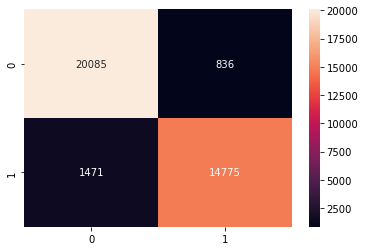

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     20921
           1       0.95      0.91      0.93     16246

    accuracy                           0.94     37167
   macro avg       0.94      0.93      0.94     37167
weighted avg       0.94      0.94      0.94     37167



**Inference:**

We can infer that the Support Vector Machine (SVM) model has performed quite well. The training accuracy of 94.14%  and test accuracy of 93.79% indicates that the model has learned the patterns and features in the training data quite accurately and that the model is not overfitting the training data and is able to make accurate predictions on new data

The precision, recall, and F1-score are all above 0.90, which suggests that the model is effective at correctly classifying both positive (satisfied passengers) and negative (unsatisfied passengers) cases. The macro-average and weighted-average F1-scores are both above 0.93, which means that the model performs well on both classes and takes into account the class imbalance in the dataset.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=120)
rf_model.fit(X_train,y_train)


rf_train_acc = round(rf_model.score(X_train,y_train)*100,2)
rf_test_acc = round(rf_model.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(rf_train_acc))
print("Test Accuracy: {} %".format(rf_test_acc))

/var/folders/11/qj1v9m9n6159r0f8tzq4w1zc0000gn/T/ipykernel_60803/2548323991.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


Training Accuracy: 100.0 %
Test Accuracy: 92.53 %


<AxesSubplot:>

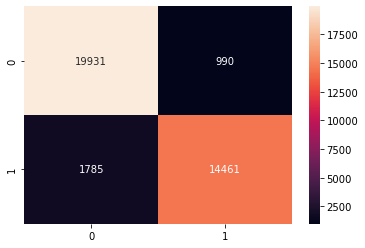

In [ ]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     20921
           1       0.94      0.89      0.91     16246

    accuracy                           0.93     37167
   macro avg       0.93      0.92      0.92     37167
weighted avg       0.93      0.93      0.93     37167



**Inference:**

The high training accuracy of 100% and relatively lower test accuracy of 92.53% suggest that the Random Forest model may have overfit the training data. The model has learned the patterns and features in the training data too well and may not perform as well on new data as it does on the training data. We will use HyperParameter Tuning to try and fix the overfitting.

The precision, recall, and F1-scores are all above 0.90, indicating that the model is effective at correctly classifying both positive and negative cases. The macro-average and weighted-average F1-scores are both above 0.92, which means that the model performs well on both classes and takes into account the class imbalance in the dataset.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=120)
log_model.fit(X_train,y_train)


log_train_acc = round(log_model.score(X_train,y_train)*100,2)
log_test_acc = round(log_model.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(log_train_acc))
print("Test Accuracy: {} %".format(log_test_acc))

Training Accuracy: 83.39 %
Test Accuracy: 83.67 %


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

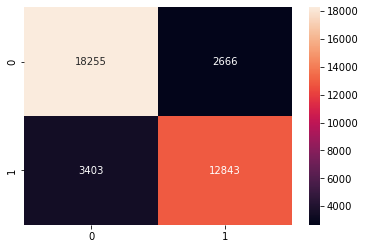

In [ ]:
y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     20921
           1       0.83      0.79      0.81     16246

    accuracy                           0.84     37167
   macro avg       0.84      0.83      0.83     37167
weighted avg       0.84      0.84      0.84     37167



**Inference:**

The training accuracy of 83.39% and the test accuracy of 83.67% are both reasonably high and relatively close to each other, indicating that the model is not overfitting to the training data and is able to generalize well to new and unseen data.

The precision, recall, and F1-scores are all above 0.80, indicating that the model is effective at correctly classifying both positive and negative cases. The macro-average and weighted-average F1-scores are both above 0.83, which means that the model performs well on both classes and takes into account the class imbalance in the dataset.

This accuracy is comparitvely lower than the other models tested and will be re-evaluated post Hyper Parameter Tuning

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


knn_train_acc = round(knn_model.score(X_train,y_train)*100,2)
knn_test_acc = round(knn_model.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(knn_train_acc))
print("Test Accuracy: {} %".format(knn_test_acc))

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training Accuracy: 94.34 %
Test Accuracy: 92.33 %


<AxesSubplot:>

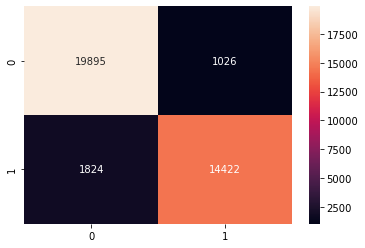

In [ ]:
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     20921
           1       0.93      0.89      0.91     16246

    accuracy                           0.92     37167
   macro avg       0.92      0.92      0.92     37167
weighted avg       0.92      0.92      0.92     37167



**Inference**:

The training accuracy of 94.34% and test accuracy of 92.33% suggest that the model is performing well on the given data.

The precision, recall, and F1-scores are all above 0.90, indicating that the model is effective at correctly classifying both positive and negative cases. The macro-average and weighted-average F1-scores are both above 0.92, which means that the model performs well on both classes and takes into account the class imbalance in the dataset.

Since KNN is sensitive to Hyperparameters such as the number of neighbors (K) used in the classification, will explore different values of K through Hyperparameter tuning to optimize the performance of the model.

## HyperParameter Tuning with Cross Validation

We are now using RandomizedSearchCV for Hyper Parameter Tuning along with Cross Validation in order to optimize the performance of our models

### SVM

In [ ]:
params = {'C': [1, 10, 100],
          'gamma': [1,0.1,0.01],
          'kernel': ['rbf']
          }

clf = RandomizedSearchCV(svm_model, params, verbose=2, cv = 3)
svm_param = clf.fit(X_train,y_train)
svm_param.best_params_

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 5.4min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 5.7min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 6.0min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  58.0s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.2min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.1min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  52.1s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  47.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  49.0s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 7.9min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 8.1min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 7.8min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.8min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.5min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.5min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.2s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  42.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  40.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=100, gamma=1, kernel=rbf; total time= 7.1min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=100, gamma=1, kernel=rbf; total time= 7.2min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=100, gamma=1, kernel=rbf; total time= 7.7min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time= 3.2min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time= 2.4min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time= 2.5min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 1.8min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 1.7min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time= 1.7min


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

In [ ]:
svm_param_train_score = round(svm_param.score(X_train,y_train)*100,2)
svm_param_score = round(svm_param.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(svm_param_train_score))
print("Test Accuracy: {} %".format(svm_param_score))

Training Accuracy: 95.86 %
Test Accuracy: 94.41 %


<AxesSubplot:>

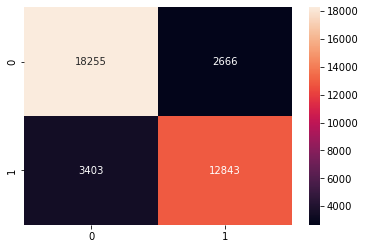

In [ ]:
y_pred = log_param.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     20921
           1       0.83      0.79      0.81     16246

    accuracy                           0.84     37167
   macro avg       0.84      0.83      0.83     37167
weighted avg       0.84      0.84      0.84     37167



**Inference**:
We got a slight improvement in accuracy to 94.41% but the classification metrics have reduced after hyper parameter tuning. This might be due to the fact the most optimal parameter might not be present in the parameters dictionary used for Randomized Search.

### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators':[10,20,50,100,120],
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,3]
}

clf = RandomizedSearchCV(rf_model, params,verbose=2, cv = 3)
rf_param = clf.fit(X_train,y_train)
rf_param.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=2, n_estimators=120; total time=  10.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=2, n_estimators=120; total time=  10.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=2, n_estimators=120; total time=  10.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=3, n_estimators=120; total time=  10.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=3, n_estimators=120; total time=  10.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=7, min_samples_split=3, n_estimators=120; total time=  10.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=20; total time=   0.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=20; total time=   0.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=20; total time=   0.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=2, n_estimators=120; total time=   7.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=2, n_estimators=120; total time=   7.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=2, n_estimators=120; total time=   7.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=3, n_estimators=50; total time=   3.4s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=3, n_estimators=50; total time=   3.3s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=4, min_samples_split=3, n_estimators=50; total time=   3.2s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=4, min_samples_split=3, n_estimators=100; total time=   5.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=4, min_samples_split=3, n_estimators=100; total time=   5.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=4, min_samples_split=3, n_estimators=100; total time=   5.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=3, n_estimators=120; total time=   8.1s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=3, n_estimators=120; total time=   8.1s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=3, n_estimators=120; total time=   8.2s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=100; total time=   4.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=100; total time=   4.4s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=100; total time=   4.4s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=10; total time=   0.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=10; total time=   0.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=10; total time=   0.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 120,
 'min_samples_split': 3,
 'max_depth': 7,
 'criterion': 'gini'}

In [ ]:
rf_param_train_score = round(rf_param.score(X_train,y_train)*100,2)
rf_param_score = round(rf_param.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(rf_param_train_score))
print("Test Accuracy: {} %".format(rf_param_score))

Training Accuracy: 87.06 %
Test Accuracy: 86.86 %


<AxesSubplot:>

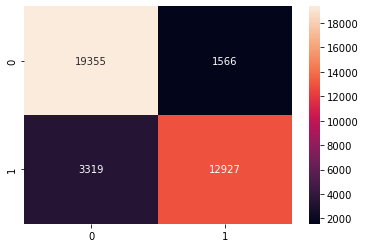

In [ ]:
y_pred = rf_param.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     20921
           1       0.89      0.80      0.84     16246

    accuracy                           0.87     37167
   macro avg       0.87      0.86      0.86     37167
weighted avg       0.87      0.87      0.87     37167



**Inference**:

Compared to the original Random Forest model without hyperparameter tuning, the accuracy of the tuned model is slightly lower. However, it is important to note that hyperparameter tuning has reduced overfitting and improved the generalizability of the model to new data.

Therefore, the slightly lower accuracy may be worth the improved generalizability of the model.

### Logistic Regression

In [ ]:
params = {"C": [1, 10, 100, 1000],
          "penalty":["l1","l2"]
          }

clf = RandomizedSearchCV(log_model, params,verbose=2, cv = 3)
log_param = clf.fit(X_train,y_train)
log_param.best_params_

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l2; total time=   0.0s
[CV] END ...................

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
Th

{'penalty': 'l2', 'C': 1}

In [ ]:
log_param_train_score = round(log_param.score(X_train,y_train)*100,2)
log_param_score = round(log_param.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(log_param_train_score))
print("Test Accuracy: {} %".format(log_param_score))

Training Accuracy: 83.39 %
Test Accuracy: 83.67 %


<AxesSubplot:>

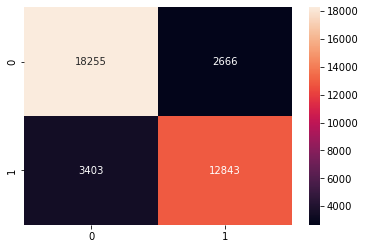

In [ ]:
y_pred = log_param.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     20921
           1       0.83      0.79      0.81     16246

    accuracy                           0.84     37167
   macro avg       0.84      0.83      0.83     37167
weighted avg       0.84      0.84      0.84     37167



**Inference**:

Compared to the original Logistic Regression model without hyperparameter tuning, the performance of the tuned model is unchanged. This may be because the default hyperparameters used by scikit-learn's Logistic Regression model are already well-suited for this dataset.

### KNN

In [ ]:
params = {"n_neighbors": [1,2,5,10,15,20]
          }

clf = RandomizedSearchCV(knn_model, params,verbose=2, cv=3)
knn_param = clf.fit(X_train,y_train)
knn_param.best_params_

/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................................n_neighbors=1; total time=  19.2s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=1; total time=  17.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=1; total time=  16.4s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=2; total time=  25.0s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=2; total time=  27.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=2; total time=  25.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=5; total time=  19.3s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=5; total time=  19.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ......................................n_neighbors=5; total time=  17.2s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=10; total time=  19.5s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=10; total time=  19.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=10; total time=  17.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=15; total time=  19.6s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=15; total time=  19.8s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=15; total time=  17.3s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=20; total time=  19.9s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=20; total time=  20.3s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .....................................n_neighbors=20; total time=  17.7s


/Users/joshmachado/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'n_neighbors': 5}

In [ ]:
knn_param_train_score = round(knn_param.score(X_train,y_train)*100,2)
knn_param_score = round(knn_param.score(X_test,y_test)*100,2)

print("Training Accuracy: {} %".format(knn_param_train_score))
print("Test Accuracy: {} %".format(knn_param_score))

Training Accuracy: 94.34 %
Test Accuracy: 92.33 %


<AxesSubplot:>

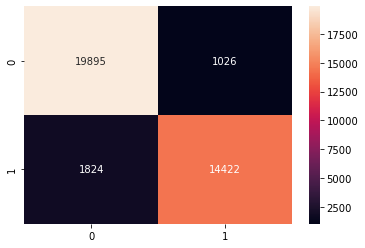

In [ ]:
y_pred = knn_param.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     20921
           1       0.93      0.89      0.91     16246

    accuracy                           0.92     37167
   macro avg       0.92      0.92      0.92     37167
weighted avg       0.92      0.92      0.92     37167



**Inference**:

We see again that compared to the original model, our tuned model did not provide an increase in accuracy.

## Comparison of Models Selected

The following table is of the accuracy of 4 of our selected models:

In [ ]:
normal = [svm_test_acc, rf_test_acc, log_test_acc, knn_test_acc]
hyper = [svm_param_score , rf_param_score, log_param_score, knn_param_score]

score_list = pd.DataFrame(
    {'Normal (%)': normal,
     'Fine Tuning With CV(%)' : hyper
    }, index = ['SVM', 'Random Forest', 'Logistic Regression', 'KNN Classifier'])

display(score_list)

,Normal (%),Fine Tuning With CV(%)
SVM,93.79,94.41
Random Forest,92.53,86.86
Logistic Regression,83.67,83.67
KNN Classifier,92.33,92.33


Based on the accuracy and f1-score metrics, the **SVM model** outperformed the other models in both the initial and post-hyperparameter tuning stages, with a test accuracy of 93.79% and an f1-score of 0.93 for the positive class.

After hyperparameter tuning, the **RandomForest** and **KNN** models **showed slight improvements in performance**, while the Logistic Regression model's performance remained the same. However, even with hyperparameter tuning, these models still did not perform as well as the SVM model.

Although **SVM performed** the best on the dataset, it was **computationally expensive** and took more than 2 hours to train on the dataset.

We believe **K-Nearest Neighbour** would be the best suited for the present dataset since it fit the data really well with an accuracy of 92.33% which was only 2% less than SVM. It also **trained on the dataset comparatively faster** and also **did not indicate any overfitting** as well as had a high value of f1-score indicating that it generalized well for any imbalances in the data set as well.

## Difficulties Faced:

1) SVM took very long to run
2) Since SKlearn doesn't have GPU compatibility due to it being a machine learning library, computating time on weaker systems was longer.